In [12]:
import pandas as pd
import numpy as np
import os 
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#merging processed file into raw merge file for further processing
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "processed").exists())

#creating 2 columns to identify source file and if ios or android
df = pd.read_csv(root / "data" / "processed" / "merged" / "parent_clean.csv", header=0)
df.head()

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,...,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,speed_gap,aggressive
0,0,android_turns.csv,4.0,10.394929,7.244125,0.016991,2.0,1.480796,17.323687,6.789408,...,0.800598,0.854956,8.662511,9.521707,67.596880,69.319600,22.941639,20.335337,-10.534279,0
1,0,android_turns.csv,4.0,9.401910,7.497719,0.016103,2.0,1.693853,6.197542,10.101060,...,1.051501,1.147173,9.708605,11.245602,80.071320,84.723694,20.737572,21.819538,3.903518,0
2,0,android_turns.csv,5.0,11.290954,4.244563,0.008359,2.0,21.173470,11.229438,9.081976,...,1.494703,1.494703,11.732657,24.616348,44.000920,105.462135,18.996666,29.467962,-2.147462,0
3,0,android_turns.csv,5.0,12.743101,3.173500,0.007654,1.0,15.306123,10.714942,13.421639,...,1.770240,1.770240,10.335592,17.929585,45.601433,57.610783,23.959110,21.440578,2.706697,0
4,0,android_turns.csv,5.0,8.986107,5.990321,0.013587,0.0,19.387754,2.729067,20.937756,...,1.698927,2.619599,11.501888,2.787075,74.401410,16.806042,91.713660,12.708904,18.208689,0


In [14]:
df.columns.tolist()

['is_ios',
 'source_file',
 'eventType',
 'eventSampleSpeed',
 'eventDurationSeconds',
 'eventMilesDriven',
 'eventSensorDetectionMthd',
 'eventGPSSignalStrength',
 'eventStartSpeed',
 'eventEndSpeed',
 'memsMedianLateralAccel',
 'memsP75LateralAccel',
 'memsP95LateralAccel',
 'memsMedianHorizontalNorm',
 'memsP75HorizontalNorm',
 'memsP95HorizontalNorm',
 'gpsMedianLateralAccel',
 'gpsP75LateralAccel',
 'gpsP95LateralAccel',
 'bearing_angular_change_per_second',
 'gyro_angular_change_per_second',
 'bearingAngleChange',
 'gyroAngleChange',
 'mems_radius',
 'gps_radius',
 'speed_gap',
 'aggressive']

In [15]:
# columns to keep (with the earlier-dropped ones removed)
keep_cols = [
    'is_ios',
    'source_file',
    "eventType",
    "eventSampleSpeed",
    "eventDurationSeconds",
    "eventMilesDriven",
    "eventSensorDetectionMthd",
    "eventGPSSignalStrength",
    "eventStartSpeed",
    "eventEndSpeed",
    "memsMedianHorizontalNorm",
    "memsP75HorizontalNorm",
    "memsP95HorizontalNorm",
    "gyro_angular_change_per_second",
    "gyroAngleChange",
    "mems_radius"
]

# keep only these columns
df = df[[c for c in keep_cols if c in df.columns]]

print(df.columns.to_list())

['is_ios', 'source_file', 'eventType', 'eventSampleSpeed', 'eventDurationSeconds', 'eventMilesDriven', 'eventSensorDetectionMthd', 'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed', 'memsMedianHorizontalNorm', 'memsP75HorizontalNorm', 'memsP95HorizontalNorm', 'gyro_angular_change_per_second', 'gyroAngleChange', 'mems_radius']


In [16]:
df.shape

(56784, 16)

In [17]:
df.groupby("source_file")["memsMedianHorizontalNorm"].describe()

,count,mean,std,min,25%,50%,75%,max
source_file,,,,,,,,
android_turns.csv,1148.0,1.813858,0.999211,0.152835,1.274197,1.754192,2.202498,15.138969
ios_turns.csv,55636.0,2.019915,1.110210,0.007562,1.336542,1.866387,2.467759,29.881191


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_18922/3200314501.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


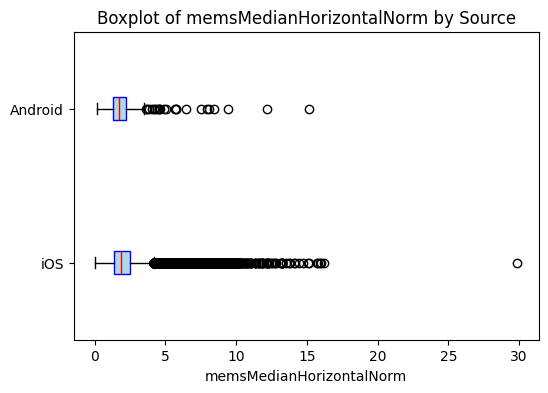

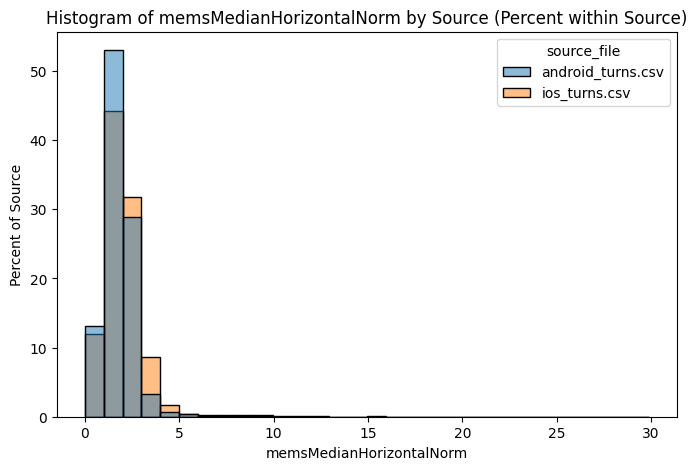

In [18]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['memsMedianHorizontalNorm']
android_data = df[df['is_ios'] == 0]['memsMedianHorizontalNorm']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsMedianHorizontalNorm by Source")
plt.xlabel("memsMedianHorizontalNorm")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="memsMedianHorizontalNorm", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of memsMedianHorizontalNorm by Source (Percent within Source)")
plt.xlabel("memsMedianHorizontalNorm")
plt.ylabel("Percent of Source")
plt.show()

In [21]:
df[df['memsMedianHorizontalNorm'] > 15]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius
952,0,android_turns.csv,5.0,5.790157,5.939360,0.013660,0.0,4.493041,3.001880,6.425670,15.138969,25.500704,46.254982,1.299296,7.764041,4.170873
6632,1,ios_turns.csv,5.0,6.113079,2.936750,0.005434,0.0,4.725771,7.577500,5.753754,15.170236,21.621105,38.918860,3.775002,11.238105,1.185059
14655,1,ios_turns.csv,4.0,6.791724,1.971062,0.004293,0.0,4.743431,7.433039,7.208134,16.027048,24.269312,34.990490,16.371885,32.928580,3.754021
24757,1,ios_turns.csv,5.0,6.235659,3.949188,0.029730,0.0,6.765160,8.526132,3.320038,15.052169,22.956871,40.922592,6.838202,27.280909,6.285867
27827,1,ios_turns.csv,4.0,12.625673,1.961250,0.005886,0.0,5.254562,13.496828,10.247534,15.933853,16.838737,19.196880,53.025536,106.118710,1.446076
41779,1,ios_turns.csv,4.0,5.476859,0.965422,0.005747,0.0,7.152839,5.783536,5.170182,15.711466,21.732285,29.056820,3.080060,3.097455,7.835816
48588,1,ios_turns.csv,4.0,10.063519,0.953234,0.003774,0.0,4.814445,9.508160,10.618877,16.240120,16.335320,16.784903,1.961987,1.948160,4042.909200
50031,1,ios_turns.csv,4.0,6.822870,0.957875,0.002371,0.0,4.688431,6.631047,7.014693,29.881191,35.152584,44.420760,74.887930,74.722170,1.434486
54843,1,ios_turns.csv,5.0,9.931807,1.955625,0.006554,0.0,4.740307,8.908216,10.705002,15.794904,16.133326,17.105710,1.972368,3.937570,264.328280


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_18922/3245568579.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


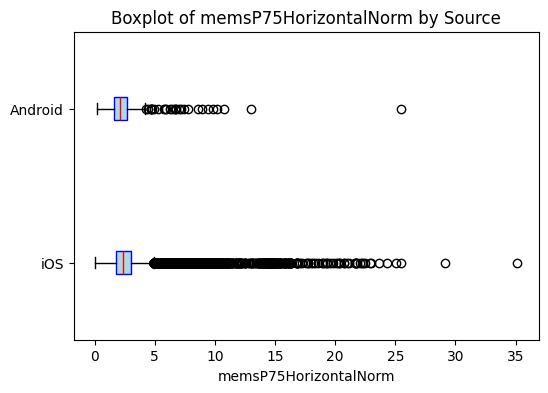

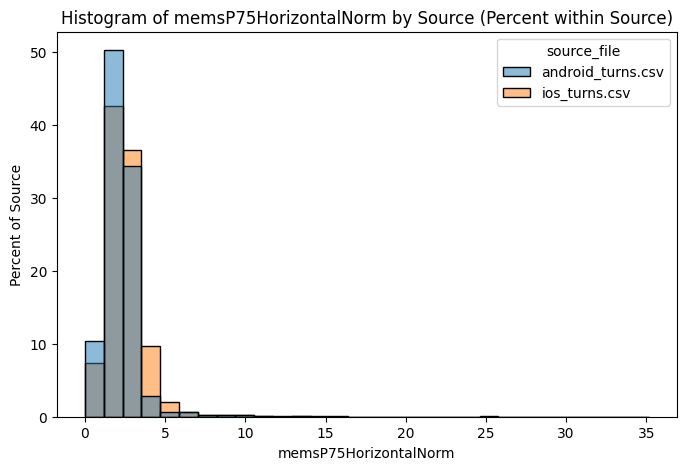

In [22]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['memsP75HorizontalNorm']
android_data = df[df['is_ios'] == 0]['memsP75HorizontalNorm']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsP75HorizontalNorm by Source")
plt.xlabel("memsP75HorizontalNorm")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="memsP75HorizontalNorm", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of memsP75HorizontalNorm by Source (Percent within Source)")
plt.xlabel("memsP75HorizontalNorm")
plt.ylabel("Percent of Source")
plt.show()

In [28]:
df[(df['memsP75HorizontalNorm'] > 15) & (df['source_file'] == 'android_turns.csv')]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius
952,0,android_turns.csv,5.0,5.790157,5.93936,0.01366,0.0,4.493041,3.00188,6.42567,15.138969,25.500704,46.254982,1.299296,7.764041,4.170873


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_18922/836768223.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


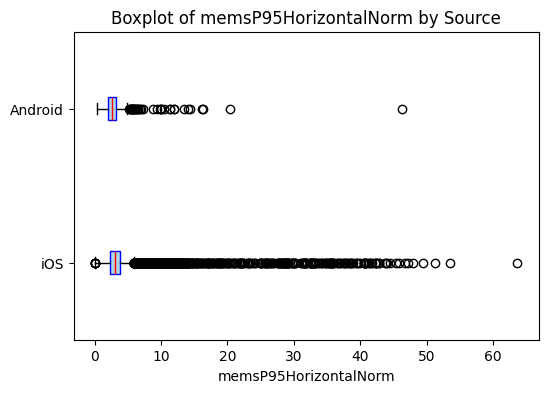

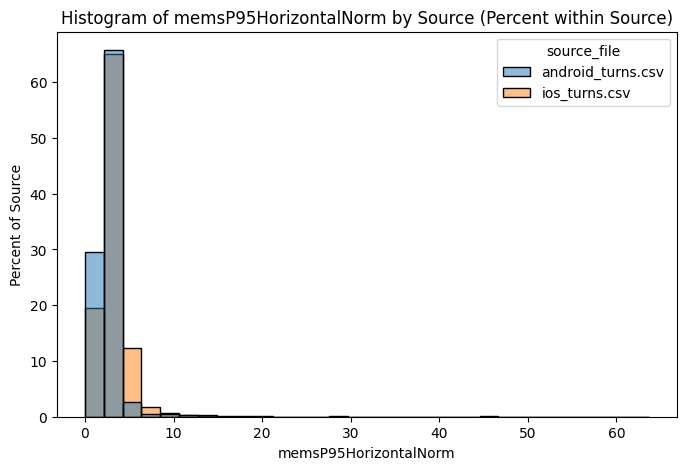

In [29]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['memsP95HorizontalNorm']
android_data = df[df['is_ios'] == 0]['memsP95HorizontalNorm']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsP95HorizontalNorm by Source")
plt.xlabel("memsP95HorizontalNorm")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="memsP95HorizontalNorm", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of memsP95HorizontalNorm by Source (Percent within Source)")
plt.xlabel("memsP95HorizontalNorm")
plt.ylabel("Percent of Source")
plt.show()

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_18922/1063449005.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


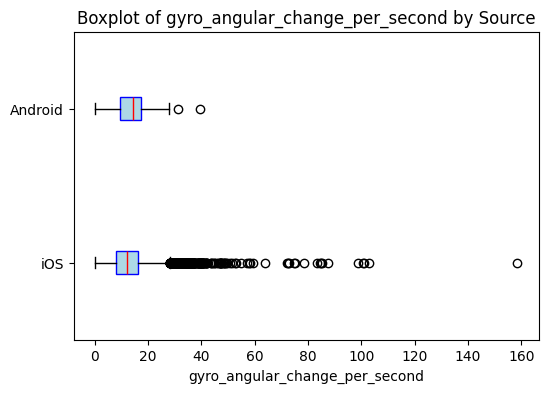

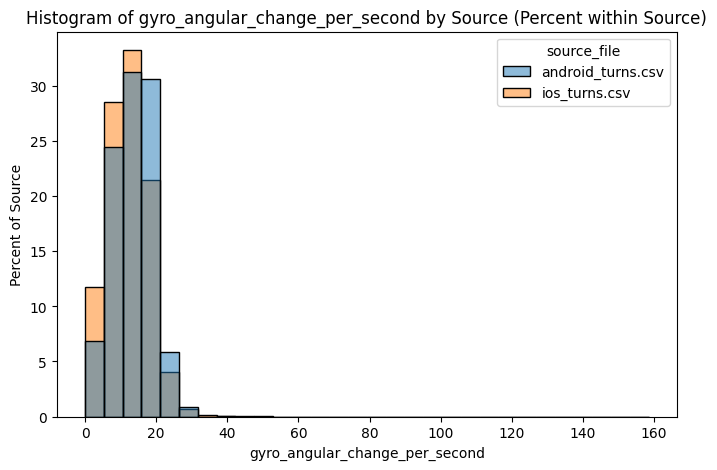

In [30]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['gyro_angular_change_per_second']
android_data = df[df['is_ios'] == 0]['gyro_angular_change_per_second']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gyro_angular_change_per_second by Source")
plt.xlabel("gyro_angular_change_per_second")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="gyro_angular_change_per_second", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of gyro_angular_change_per_second by Source (Percent within Source)")
plt.xlabel("gyro_angular_change_per_second")
plt.ylabel("Percent of Source")
plt.show()

In [32]:
df[df['gyro_angular_change_per_second'] > 100]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius
17988,1,ios_turns.csv,5.0,17.965996,0.955000,0.009690,0.0,6.095498,18.476896,17.455095,6.680372,9.334602,11.726278,100.92776,100.40210,1.563272
19910,1,ios_turns.csv,5.0,24.231146,1.963000,0.013987,0.0,4.781910,24.526293,23.856098,3.291846,5.590874,15.000029,100.59613,201.50021,0.744900
21319,1,ios_turns.csv,4.0,6.407975,0.958313,0.002011,0.0,4.800277,4.767684,8.048265,9.763654,11.084121,15.349679,102.87653,102.69571,1.016028
30611,1,ios_turns.csv,4.0,19.234531,0.960203,0.005589,0.0,4.724898,18.001537,20.467527,4.691605,8.615368,12.616044,158.51184,158.54540,0.905455


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_18922/4053563035.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


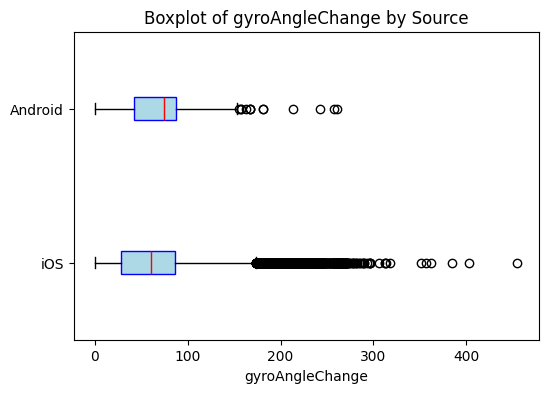

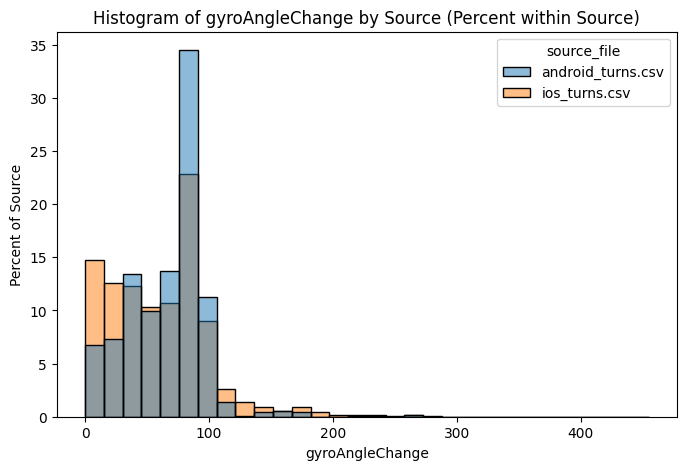

In [33]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['gyroAngleChange']
android_data = df[df['is_ios'] == 0]['gyroAngleChange']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gyroAngleChange by Source")
plt.xlabel("gyroAngleChange")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="gyroAngleChange", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of gyroAngleChange by Source (Percent within Source)")
plt.xlabel("gyroAngleChange")
plt.ylabel("Percent of Source")
plt.show()

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_18922/2416860586.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


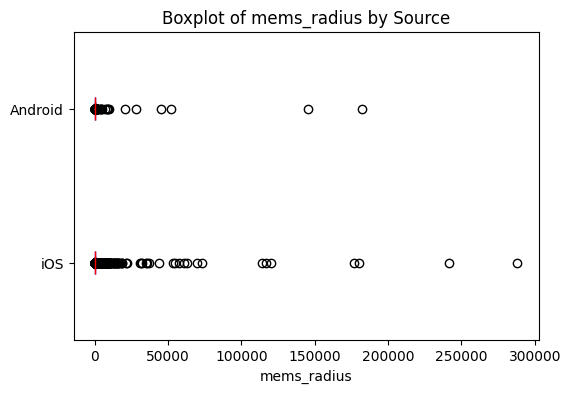

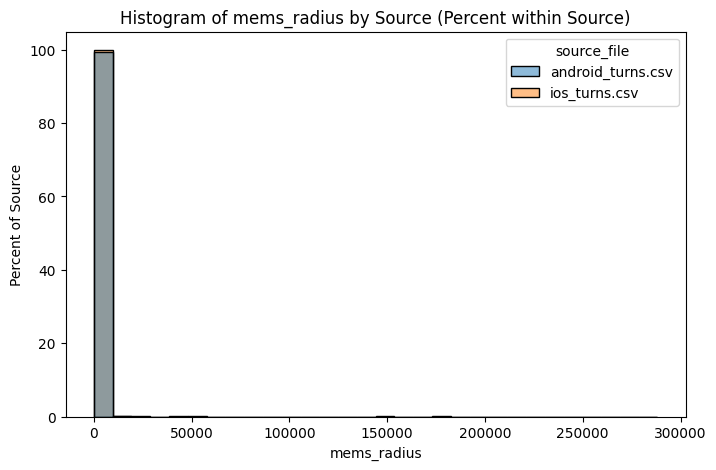

In [34]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['mems_radius']
android_data = df[df['is_ios'] == 0]['mems_radius']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of mems_radius by Source")
plt.xlabel("mems_radius")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="mems_radius", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Percent within Source)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

In [35]:
df['mems_radius'].describe()

count     56784.000000
mean        122.072551
std        2496.818054
min           0.396203
25%          13.332791
50%          24.207271
75%          48.170028
max      288211.660000
Name: mems_radius, dtype: float64

In [41]:
df[(df['mems_radius'] > 150) & (df['source_file'] == 'android_turns.csv')]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,memsP75HorizontalNorm,memsP95HorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius
13,0,android_turns.csv,5.0,5.950260,1.983875,0.002211,0.0,11.224490,6.352909,5.771305,5.749575,5.841262,6.543166,2.600079,5.261395,6954.39500
17,0,android_turns.csv,5.0,12.407560,1.984344,0.006954,0.0,7.142857,9.954382,15.367777,0.287022,0.407114,0.511658,0.098713,0.199798,8054.92330
44,0,android_turns.csv,5.0,15.541140,2.935227,0.012317,0.0,8.163265,11.699197,19.752180,2.369217,2.652407,2.808069,0.411450,1.224020,792.94794
45,0,android_turns.csv,4.0,19.489336,2.935207,0.010967,0.0,9.183674,28.453875,9.797797,1.856103,2.135851,2.432933,0.011387,0.033874,52144.42000
46,0,android_turns.csv,5.0,12.362821,1.943563,0.007654,0.0,10.204082,9.104344,14.763803,1.749179,1.874574,2.127118,0.130878,0.259561,804.26180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0,android_turns.csv,5.0,9.186234,0.977852,0.002648,0.0,5.237783,9.269062,9.103406,3.276302,3.609477,4.138382,1.960938,1.988525,255.37220
1010,0,android_turns.csv,4.0,16.313000,3.947951,0.018115,0.0,1.765362,10.445393,21.430855,2.338749,2.653116,3.121341,0.145886,0.581236,612.90607
1055,0,android_turns.csv,5.0,12.278729,4.416875,0.013368,0.0,3.315172,13.253581,13.178111,2.508234,3.203592,3.684679,1.147773,5.111126,619.90250
1072,0,android_turns.csv,4.0,14.154725,2.969750,0.012253,0.0,4.387582,12.998606,16.870586,1.998085,2.656574,3.070733,6.800753,20.442837,805.33940
